In [1]:
from google.colab import drive # Подключаем google disk
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data_image.zip -d /content/
!unzip /content/data.zip -d /content/

In [ ]:
# !pip install torch
# import torch
# torch.cuda.is_available()

True

In [4]:
# !rm -rf ./data.zip

In [ ]:
# !pip install keras
# !pip install tensorflow
# !pip install matplotlib
# !pip install opencv-contrib-python
# !pip install pandas
# !pip install scikit-learn

In [ ]:
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
from tensorflow.keras.applications import EfficientNetB0, MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, UpSampling2D

In [7]:
import matplotlib
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using matplotlib backend: <object object at 0x7f1387a5c160>


In [ ]:
!rm my-data2.csv

In [16]:
def read_txt_files_from_directory_to_one_file(directory_path, to_file_path):
    import os
    count = 0
    for filename in os.listdir(directory_path):
        with open(os.path.join(directory_path, filename), "r") as file:
            lines = file.readlines() # читаем все строки в список lines
            for line in lines:
                with open(to_file_path, "a") as fileWrite:
                    ln = filename.split('.')[0] + ',' +line + '\n'
                    if ln and len(ln.rstrip()) > 0:
                        fileWrite.write(ln.rstrip().replace(' ', ',') + '\n')
        file.close()
    fileWrite.close()

In [17]:
read_txt_files_from_directory_to_one_file('./data', './my-data2.csv')

In [18]:
column_names = ["file_name", "obj", "btl", "btr", "bbr", "bbl"]
df = pd.read_csv('./my-data2.csv', names=column_names)
print(df.head(20))

   file_name obj       btl       btr       bbr       bbl
0       1127   0  0.311414  0.509305  0.198511  0.378412
1       4372   0  0.270681  0.440998  0.096107  0.324818
2       4372   0  0.435523  0.441606  0.138686  0.379562
3       3407   0  0.533774  0.536344  0.220264  0.486784
4       7548   0  0.560204  0.486888  0.188265  0.429286
5       7548   1  0.612755  0.305153  0.078061  0.060714
6       7548   2  0.535204  0.441378  0.133163  0.177041
7       5923   0  0.400398  0.388446  0.111554  0.314741
8       3459   0  0.465605  0.428025  0.155414  0.412739
9       7029   0  0.460074  0.483415  0.180590  0.450860
10      7029   0  0.585381  0.493243  0.111794  0.426290
11      7029   0  0.855651  0.616708  0.256757  0.321867
12      7029   1  0.506143  0.296069  0.076167  0.066339
13      7029   2  0.429975  0.423833  0.100737  0.213759
14      7564   0  0.504300  0.493243  0.160934  0.436118
15      7564   2  0.504297  0.471744  0.153906  0.203931
16      4785   0  0.385749  0.3

In [19]:
df.shape

(22940, 6)

In [20]:
print(df.tail(20))

      file_name obj       btl       btr       bbr       bbl
22920      6358   0  0.693262  0.534279  0.225768  0.489362
22921      6358   1  0.479314  0.414894  0.192671  0.174941
22922      6358   2  0.484634  0.680260  0.269504  0.197400
22923       881   0  0.313281  0.500000  0.168750  0.315625
22924      6329   0  0.536052  0.469858  0.128842  0.372340
22925      6329   0  0.682033  0.542553  0.198582  0.475177
22926      6329   0  0.472222  0.554374  0.265957  0.451537
22927      6329   1  0.436170  0.401300  0.151300  0.135934
22928      6329   2  0.471631  0.660165  0.255319  0.237589
22929       712   0  0.293928  0.444444  0.138243  0.338501
22930       419   0  0.598906  0.538721  0.207071  0.483165
22931       419   1  0.648990  0.345118  0.103535  0.090909
22932       419   2  0.579125  0.502525  0.157407  0.159933
22933       419   0  0.854377  0.603535  0.250000  0.353535
22934       419   2  0.860269  0.653620  0.231481  0.244949
22935      7448   0  0.525000  0.466518 

In [21]:
df = df.dropna()

In [22]:
print(df.describe())

                btl           btr           bbr           bbl
count  22422.000000  22422.000000  22422.000000  22422.000000
mean       0.490661      0.482714      0.171168      0.290013
std        0.165053      0.111266      0.074813      0.129397
min        0.035156      0.224415      0.000000      0.000000
25%        0.387694      0.412948      0.116557      0.178125
50%        0.470516      0.470703      0.153030      0.332031
75%        0.579683      0.576421      0.221116      0.395506
max        0.938800      0.760313      0.506373      0.545236


In [23]:
print(df.tail(20))

      file_name obj       btl       btr       bbr       bbl
22920      6358   0  0.693262  0.534279  0.225768  0.489362
22921      6358   1  0.479314  0.414894  0.192671  0.174941
22922      6358   2  0.484634  0.680260  0.269504  0.197400
22923       881   0  0.313281  0.500000  0.168750  0.315625
22924      6329   0  0.536052  0.469858  0.128842  0.372340
22925      6329   0  0.682033  0.542553  0.198582  0.475177
22926      6329   0  0.472222  0.554374  0.265957  0.451537
22927      6329   1  0.436170  0.401300  0.151300  0.135934
22928      6329   2  0.471631  0.660165  0.255319  0.237589
22929       712   0  0.293928  0.444444  0.138243  0.338501
22930       419   0  0.598906  0.538721  0.207071  0.483165
22931       419   1  0.648990  0.345118  0.103535  0.090909
22932       419   2  0.579125  0.502525  0.157407  0.159933
22933       419   0  0.854377  0.603535  0.250000  0.353535
22934       419   2  0.860269  0.653620  0.231481  0.244949
22935      7448   0  0.525000  0.466518 

In [24]:
# Преобразуем категориальный признак в One-hot encoding
onehot_df = pd.get_dummies(df['obj'], prefix='obj')

# Объединяем исходный DataFrame и One-hot encoding DataFrame
df2 = pd.concat([df, onehot_df], axis=1)

# Удаляем исходный категориальный столбец
df2.drop('obj', axis=1, inplace=True)

In [25]:
print(df2.tail(5))

      file_name       btl       btr       bbr       bbl  obj_0  obj_1  obj_2
22935      7448  0.525000  0.466518  0.159821  0.440179      1      0      0
22936      7448  0.556250  0.286607  0.086607  0.067857      0      1      0
22937      7448  0.513839  0.427679  0.128571  0.160714      0      0      1
22938      4487  0.260949  0.440389  0.091241  0.323601      1      0      0
22939      4487  0.525547  0.582117  0.189781  0.400243      1      0      0


In [26]:
df2.to_csv('./clean_data.csv', index=False)

In [33]:
df2 = pd.read_csv('./clean_data.csv')

In [34]:
df2.shape

(22422, 8)

In [35]:
def show_image_by_url(url, w=2, h=2):
    image = cv2.imread(url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # преобразование порядка цветов
    plt.figure(figsize=(w,h))
    plt.grid(False)
    plt.imshow(image)
    plt.show()

In [36]:
print(df2.head(20))

    file_name       btl       btr       bbr       bbl  obj_0  obj_1  obj_2
0        1127  0.311414  0.509305  0.198511  0.378412      1      0      0
1        4372  0.270681  0.440998  0.096107  0.324818      1      0      0
2        4372  0.435523  0.441606  0.138686  0.379562      1      0      0
3        3407  0.533774  0.536344  0.220264  0.486784      1      0      0
4        7548  0.560204  0.486888  0.188265  0.429286      1      0      0
5        7548  0.612755  0.305153  0.078061  0.060714      0      1      0
6        7548  0.535204  0.441378  0.133163  0.177041      0      0      1
7        5923  0.400398  0.388446  0.111554  0.314741      1      0      0
8        3459  0.465605  0.428025  0.155414  0.412739      1      0      0
9        7029  0.460074  0.483415  0.180590  0.450860      1      0      0
10       7029  0.585381  0.493243  0.111794  0.426290      1      0      0
11       7029  0.855651  0.616708  0.256757  0.321867      1      0      0
12       7029  0.506143  

In [37]:
df2.shape

(22422, 8)

In [38]:
df2['image'] = None
df2['file_name'] = df2['file_name'].astype(int)
df2 = df2.sort_values('file_name')
df2 = df2.loc[df2['obj_2'] == 1]
df2 = df2.drop(columns=['obj_0'])
df2 = df2.drop(columns=['obj_1'])
df2 = df2.drop(columns=['btl'])
df2 = df2.drop(columns=['btr'])
df2 = df2.drop(columns=['bbr'])
df2 = df2.drop(columns=['bbl'])
df2 = df2.drop_duplicates()
df2.head(20)

,file_name,obj_2,image
14875,104,1,None
21437,105,1,None
18057,106,1,None
6384,107,1,None
552,108,1,None
17072,109,1,None
7571,110,1,None
21491,113,1,None
22078,135,1,None
4631,136,1,None


In [39]:
print(df2.shape)

(1877, 3)


In [40]:
import glob

In [41]:
def load(imPath):
    img = Image.open(f'./data_image/{imPath}.jpg')
    img = img.resize((224, 224))
    img_array = np.array(img)
    return img_array
df2['image'] = df2['file_name'].apply(lambda x: load(x))

In [42]:
df2.head()

,file_name,obj_2,image
14875,104,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
21437,105,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
18057,106,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6384,107,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
552,108,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [43]:
data = df2

In [44]:
data.shape

(1877, 3)

In [45]:
import tensorflow as tf

In [46]:
print(data.head())

       file_name  obj_2                                              image
14875        104      1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
21437        105      1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
18057        106      1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
6384         107      1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
552          108      1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...


In [48]:
from keras.utils import np_utils

x_data = np.array(data['image'].tolist())
y_data = data['obj_2']

print(len(x_data))

y_data = np_utils.to_categorical(y_data)

print(x_data.shape)
print(y_data.shape)

1877
(1877, 224, 224, 3)
(1877, 2)


In [49]:
X = np.array(data['image'].tolist())
y = data['obj_2']

# разделяем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
x_train[:1]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]], dtype=uint8)

In [51]:
y_train[:1]

300    1
Name: obj_2, dtype: int64

In [52]:
x_test[:1]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]], dtype=uint8)

In [53]:
y_test[:1]

13720    1
Name: obj_2, dtype: int64

In [54]:
base_model = MobileNet(weights='imagenet', include_top=False,  input_shape=(224, 224, 3))

17225924/17225924 [==============================] - 2s 0us/step


In [55]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=x)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [57]:
checkpoint = ModelCheckpoint(filepath='best_uniform_model.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [59]:
log = model.fit(x_train, y_train,
                  validation_split=0.2,
                  epochs = 50,
                  batch_size = 32,
                  verbose=1,
                  callbacks=[checkpoint])

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9124
Epoch 1: val_loss improved from inf to 7.42266, saving model to best_helmet_model.h5
33/33 [==============================] - 29s 172ms/step - loss: 0.2247 - accuracy: 0.9124 - val_loss: 7.4227 - val_accuracy: 0.0000e+00
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 2: val_loss improved from 7.42266 to 5.55959, saving model to best_helmet_model.h5
33/33 [==============================] - 4s 123ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 5.5596 - val_accuracy: 0.0000e+00
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 3: val_loss improved from 5.55959 to 2.71033, saving model to best_helmet_model.h5
33/33 [==============================] - 4s 130ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.7103 - val_accuracy: 0.0000e+00
Epoch 4/50
33/33 [==============================]

In [60]:

from keras.callbacks import ModelCheckpoint

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.callbacks import LearningRateScheduler

# Создание callback функции остановки обучения
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='min', restore_best_weights=True)

# Создание callback функции уменьшения learning rate
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

def lr_schedule(epoch):
    lr = 1e-4
    if epoch > 20:
        lr *= 0.1
    elif epoch > 15:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

checkpoint = ModelCheckpoint(filepath='best_uniform_model.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
log = model.fit(x_train, y_train,
          validation_split=0.2,
          epochs=10,
         callbacks=[early_stop, lr_scheduler, checkpoint])


Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 5.0980e-05 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.00003, saving model to best_helmet_model.h5
33/33 [==============================] - 4s 129ms/step - loss: 5.0980e-05 - accuracy: 1.0000 - val_loss: 3.1788e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 5.3615e-05 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.00003 to 0.00003, saving model to best_helmet_model.h5
33/33 [==============================] - 4s 125ms/step - loss: 5.3615e-05 - accuracy: 1.0000 - val_loss: 3.0334e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 5.2238e-05 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.00003 to 0.00003, saving model to best_helmet_model.h5
33/33 [==============================] - 4s 129ms/step - loss: 5.2238e-05 - accuracy: 1.0000 - val_loss: 2.9224e-05 - val_accuracy:

In [61]:
# Рисование графиков
import matplotlib.pyplot as plt

def show_history(history):

    # Отрисовка графика точности на обучающей выборке
    plt.plot(history.history['accuracy'],
             label='Доля верных ответов на обучающем наборе')

    # Отрисовка графика точности на проверочной выборке
    plt.plot(history.history['val_accuracy'],
             label='Доля верных ответов на проверочном наборе')

    # Отрисовка подписей осей
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')

    # Отрисовка легенды
    plt.legend()

    # Вывод графика
    plt.show()

In [62]:
def show_error(history):
    plt.plot(history.history['loss'],
             label='Ошибка на обучающем наборе')

    plt.plot(history.history['val_loss'],
             label='Ошибка на проверочном наборе')

    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')

    plt.legend()

    plt.show()

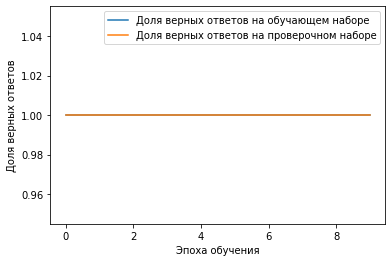

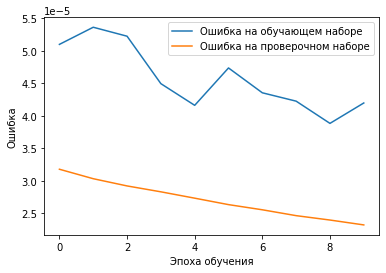

In [63]:
show_history(log)
show_error(log)

In [64]:
import tensorflow as tf
model = tf.keras.models.load_model('best_uniform_model.h5')

In [65]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

18/18 [==============================] - 2s 53ms/step - loss: 2.4483e-05 - accuracy: 1.0000
Процент верных ответов на тестовых данных: 100.0 %
